# Examples for Day 2

In [1]:
# initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# %load ml15.py
# Feature Selection with Univariate Selection
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
# load data
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
selector = SelectKBest(k=11)
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
features = df.columns
print([features[i] for i, j in enumerate(selected) if j])


['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


In [5]:
# %load ml16.py
# Model-based Feature Selection with Random Forest
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
selector = SelectFromModel(RandomForestClassifier(random_state=42), threshold='median')
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
features = df.columns
print([features[i] for i, j in enumerate(selected) if j])


['HighBP', 'HighChol', 'BMI', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Gender', 'Age', 'Education', 'Income']


In [7]:
# %load ml17.py
# Feature Selection with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
model = DecisionTreeClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=11)
features = rfe.fit_transform(X, y)
selected = rfe.get_support()
# Show selected features
features = df.columns
print([features[i] for i, j in enumerate(selected) if j])


['HighBP', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [9]:
# %load ml18.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 68.15%


In [11]:
# %load ml19.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, stratify=y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 68.20%


In [13]:
# %load ml20.py
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
model = KNeighborsClassifier()
# Create 3 partitions
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# Perform 3-fold cross-validation
results = cross_val_score(model, X, y, cv=kfold)
print(f"Accuracy: {results.mean():.2%} ({results.std():.2%})")


Accuracy: 68.68% (0.45%)


In [15]:
# %load ml21.py
# Linear Regression
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from pandas import read_csv
df = read_csv("data/real_estate_valuation_dataset.csv")
X = df.drop(columns=['House price of unit area'])
y = df['House price of unit area']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print(f'R2 score: {lr.score(X_test, y_test):.2f}')


R2 score: 0.58


In [17]:
# %load ml22.py
# k-NN Regressor
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from pandas import read_csv
df = read_csv("data/real_estate_valuation_dataset.csv")
X = df.drop(columns=['House price of unit area'])
y = df['House price of unit area']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print(f'R2 score: {knn.score(X_test, y_test):.2f}')


R2 score: 0.61


In [19]:
# %load ml23.py
# Logistic Regression
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lgr = LogisticRegression().fit(X_train, y_train)
print(f'Accuracy: {lgr.score(X_test, y_test):.2%}')

Accuracy: 72.85%


In [21]:
# %load ml24.py
# k-NN Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier().fit(X_train, y_train)
print(f'Accuracy: {knn.score(X_test, y_test):.2%}')


Accuracy: 67.19%


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

knn2 = KNeighborsClassifier().fit(Xs_train, y_train)
print(f'Accuracy: {knn2.score(Xs_test, y_test):.2%}')

Accuracy: 68.83%


In [24]:
# %load ml25.py
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.naive_bayes import GaussianNB
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
gnb = GaussianNB().fit(X_train, y_train)
print(f'Accuracy: {gnb.score(X_test, y_test):.2%}')


Accuracy: 71.04%


In [26]:
# %load ml26.py
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
svc = SVC().fit(X_train, y_train)
print(f'Accuracy: {svc.score(X_test, y_test):.2%}')


Accuracy: 73.25%


Train Accuracy: 99.92%
Test Accuracy: 64.25%


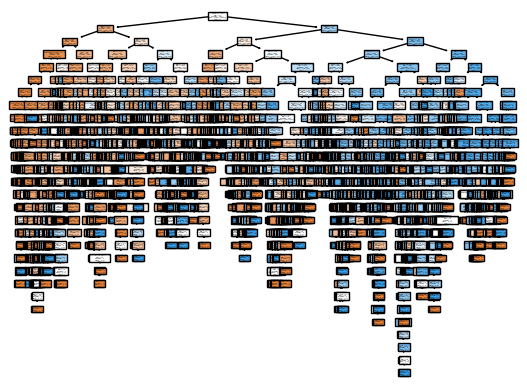

In [28]:
# %load ml27.py
# Decision Tree Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f'Train Accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test Accuracy: {dtc.score(X_test, y_test):.2%}')
plot_tree(dtc, feature_names=df.columns, class_names=['0', '1'], filled=True)
plt.show()

Train accuracy: 70.27%
Test accuracy: 67.99%


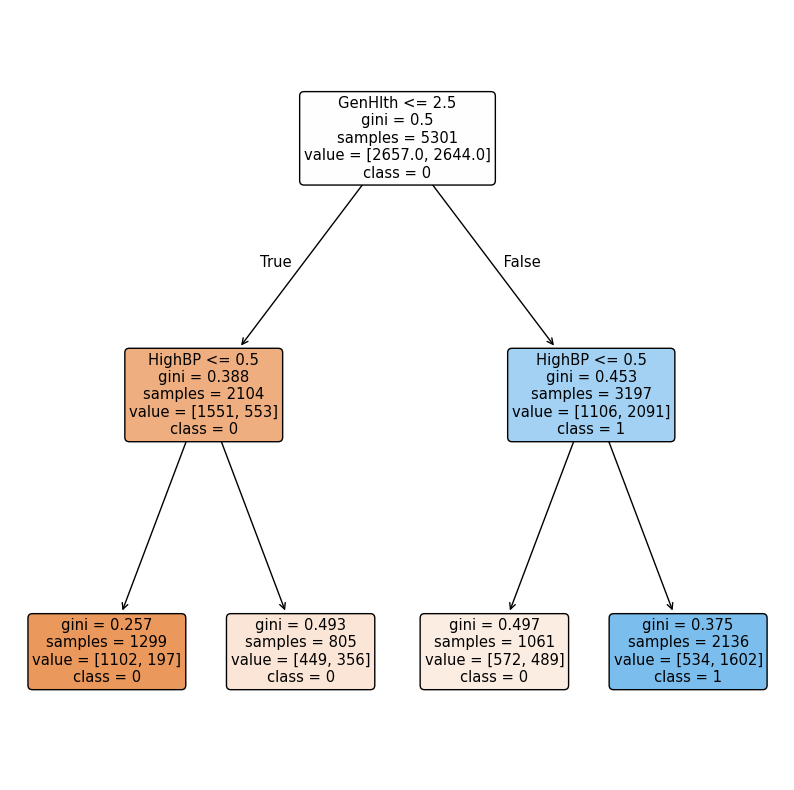

In [30]:
# %load ml28.py
# Decision Tree Classification with pre-pruning using max_depth
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')
# Plot decision tree
plt.figure(figsize=(10, 10))
plot_tree(dtc, feature_names=df.columns, class_names=['0', '1'], rounded=True, filled=True)
plt.show()


Train accuracy: 71.08%
Test accuracy: 69.57%


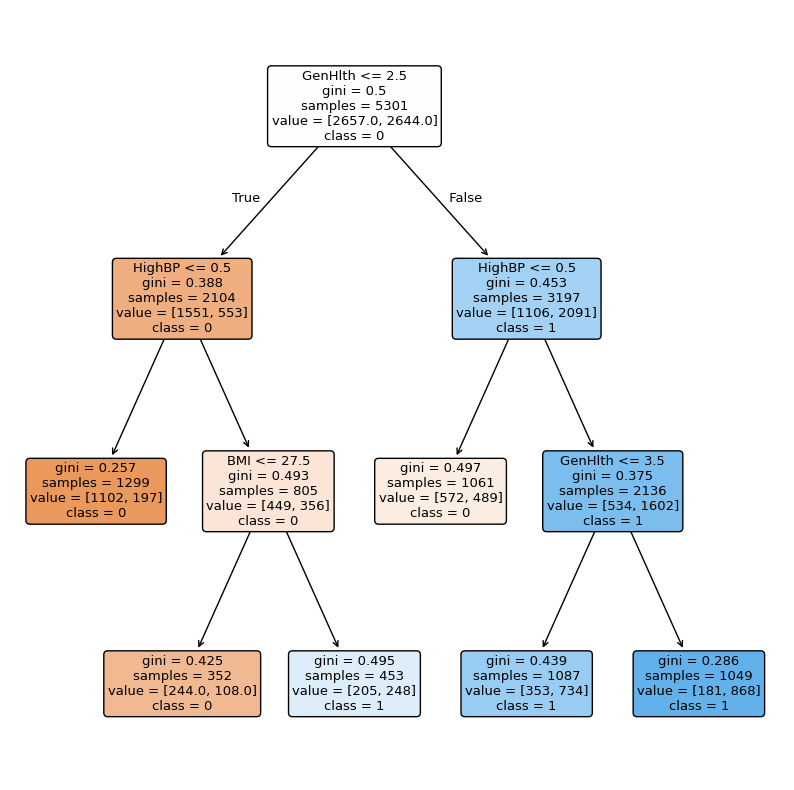

In [31]:
# Decision Tree Classification with pre-pruning using max_depth
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(max_leaf_nodes=6, random_state=42).fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')
# Plot decision tree
plt.figure(figsize=(10, 10))
plot_tree(dtc, feature_names=df.columns, class_names=['0', '1'], rounded=True, filled=True)
plt.show()

In [33]:
# %load ml29.py
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import RandomForestClassifier
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train)
print(f'Accuracy: {rfc.score(X_test, y_test):.2%}')


Accuracy: 72.96%


In [35]:
# %load ml30.py
# Gradient Boosting Tree Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import GradientBoostingClassifier
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
print(f'Accuracy: {gbc.score(X_test, y_test):.2%}')

Accuracy: 73.93%


In [37]:
# %load ml31.py
# Voting Classifier
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
df = read_csv('data/cdc_diabetes_small.csv')
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = SVC()
vtc = VotingClassifier(estimators=[('lgr', clf1), ('gnb', clf2), ('svc', clf3)], voting='hard')
vtc.fit(X_train, y_train)
print(f"Accuracy: {vtc.score(X_test, y_test):.2%}")

Accuracy: 73.19%
